<a href="https://colab.research.google.com/github/lc2232/InteriorSegmentor/blob/main/InteriorNet_Segmentor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
# Check nvcc version
!nvcc -V
# Check GCC version
!gcc --version

# Install PyTorch
!conda install pytorch==1.12.0 torchvision==0.13.0 torchaudio==0.12.0 cudatoolkit=11.3 -c pytorch
# Install mim
!pip install -U openmim
# Install mmengine
!mim install mmengine
# Install MMCV
!mim install 'mmcv >= 2.0.0rc1'


!rm -rf mmsegmentation
!git clone -b dev-1.x https://github.com/open-mmlab/mmsegmentation.git 
%cd mmsegmentation
!pip install -e .

# Check Pytorch installation
import torch, torchvision
print(torch.__version__, torch.cuda.is_available())

# Check MMSegmentation installation
import mmseg
print(mmseg.__version__)

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2022 NVIDIA Corporation
Built on Wed_Sep_21_10:33:58_PDT_2022
Cuda compilation tools, release 11.8, V11.8.89
Build cuda_11.8.r11.8/compiler.31833905_0
gcc (Ubuntu 9.4.0-1ubuntu1~20.04.1) 9.4.0
Copyright (C) 2019 Free Software Foundation, Inc.
This is free software; see the source for copying conditions.  There is NO
warranty; not even for MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.

/bin/bash: conda: command not found
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://download.openmmlab.com/mmcv/dist/cu116/torch1.13.0/index.html
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://download.openmmlab.com/mmcv/dist/cu116/torch1.13.0/index.html
Cloning into 'mmsegmentation'...
remote

In [ ]:
!mkdir checkpoints
!wget https://download.openmmlab.com/mmsegmentation/v0.5/pspnet/pspnet_r50-d8_512x1024_40k_cityscapes/pspnet_r50-d8_512x1024_40k_cityscapes_20200605_003338-2966598c.pth -P checkpoints
# !wget https://conversationhub.blob.core.windows.net/beit-share-public/beit/beit_base_patch16_224_pt22k_ft22k.pth -P checkpoints
!wget https://download.openmmlab.com/mmsegmentation/v0.5/resnest/deeplabv3plus_s101-d8_512x512_160k_ade20k/deeplabv3plus_s101-d8_512x512_160k_ade20k_20200807_144503-27b26226.pth -P checkpoints
# !python /content/mmsegmentation/tools/model_converters/beit2mmseg.py https://conversationhub.blob.core.windows.net/beit-share-public/beit/beit_base_patch16_224_pt22k_ft22k.pth pretrain/beit_base_patch16_224_pt22k_ft22k.pth

# !python tools/model_converters/vit2mmseg.py https://github.com/rwightman/pytorch-image-models/releases/download/v0.1-vitjx/jx_vit_base_p16_224-80ecf9dd.pth pretrain/jx_vit_base_p16_224-80ecf9dd.pth

--2023-03-13 17:00:09--  https://download.openmmlab.com/mmsegmentation/v0.5/pspnet/pspnet_r50-d8_512x1024_40k_cityscapes/pspnet_r50-d8_512x1024_40k_cityscapes_20200605_003338-2966598c.pth
Resolving download.openmmlab.com (download.openmmlab.com)... 8.38.121.213, 8.38.121.211, 8.38.121.209, ...
Connecting to download.openmmlab.com (download.openmmlab.com)|8.38.121.213|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 196205945 (187M) [application/octet-stream]
Saving to: ‘checkpoints/pspnet_r50-d8_512x1024_40k_cityscapes_20200605_003338-2966598c.pth’

pspnet_r50-d8_512x1 100%[===================>] 187.12M  18.1MB/s    in 10s     

2023-03-13 17:00:20 (18.1 MB/s) - ‘checkpoints/pspnet_r50-d8_512x1024_40k_cityscapes_20200605_003338-2966598c.pth’ saved [196205945/196205945]

--2023-03-13 17:00:20--  https://download.openmmlab.com/mmsegmentation/v0.5/resnest/deeplabv3plus_s101-d8_512x512_160k_ade20k/deeplabv3plus_s101-d8_512x512_160k_ade20k_20200807_144503-27b26226.p

In [ ]:
# from mmseg.apis import inference_segmentor, init_segmentor, show_result_pyplot
# from mmseg.core.evaluation import get_palette
import mmcv
# import matplotlib.pyplot as plt

# from PIL import Image


# img = mmcv.imread('/content/drive/MyDrive/Interior photos/0.png')
# plt.figure(figsize=(8, 6))
# plt.imshow(mmcv.bgr2rgb(img))
# plt.show()

# image = Image.open('/content/drive/MyDrive/Interior photos/0.png')

In [ ]:

!mkdir dataset
!cp /content/drive/MyDrive/Interior/compiled_dataset.zip /content/mmsegmentation/dataset/
!ls
!unzip /content/mmsegmentation/dataset/compiled_dataset.zip -d /content/mmsegmentation/dataset/

# FILES=/content/mmsegmentation/dataset/*

# for f in $FILES
# do
# if [[ "$f" != *\.zip ]]
# then
#   unzip f -d /content/mmsegmentation/dataset/
# fi
# done

In [ ]:
from mmseg.apis import inference_model, init_model, show_result_pyplot
# from mmseg.core.evaluation import get_palette

import json

# config_file = 'configs/pspnet/pspnet_r50-d8_512x1024_40k_cityscapes.py'
# checkpoint_file = 'checkpoints/pspnet_r50-d8_512x1024_40k_cityscapes_20200605_003338-2966598c.pth'
config_file = 'configs/resnest/resnest_s101-d8_deeplabv3plus_4xb4-160k_ade20k-512x512.py'
checkpoint_file = 'checkpoints/deeplabv3plus_s101-d8_512x512_160k_ade20k_20200807_144503-27b26226.pth'

# config_file = '/content/mmsegmentation/configs/beit/upernet_beit-base_640x640_160k_ade20k_ms.py'
# config_file = 'upernet_beit-base_8x2_640x640_160k_ade20k.py'
# checkpoint_file = '/content/mmsegmentation/pretrain/beit_base_patch16_224_pt22k_ft22k.pth'

# config_file = '/content/mmsegmentation/configs/vit/upernet_deit-b16_512x512_80k_ade20k.py'
# checkpoint_file = '/content/mmsegmentation/pretrain/jx_vit_base_p16_224-80ecf9dd.pth'

# # build the model from a config file and a checkpoint file
temp_model = init_model(config_file, checkpoint_file, device='cuda:0')

# # test a single image
img = '/content/mmsegmentation/dataset/compiled_dataset/cam/0.png'
result = inference_model(temp_model, img)

f = open('/content/mmsegmentation/dataset/compiled_dataset/cocolabel.json')

# returns JSON object as 
# a dictionary
coco_label = json.load(f)

f.close()

classes = []

for category in coco_label['categories']:
  classes.append(category["name"])

print(classes)
print(len(classes))

palette = [[120, 120, 120], [180, 120, 120], [6, 230, 230], [80, 50, 50],
               [4, 200, 3], [120, 120, 80], [140, 140, 140], [204, 5, 255],
               [230, 230, 230], [4, 250, 7], [224, 5, 255], [235, 255, 7],
               [150, 5, 61], [120, 120, 70], [8, 255, 51], [255, 6, 82],
               [143, 255, 140], [204, 255, 4], [255, 51, 7], [204, 70, 3],
               [0, 102, 200], [61, 230, 250], [255, 6, 51], [11, 102, 255],
               [255, 7, 71], [255, 9, 224], [9, 7, 230], [220, 220, 220],
               [255, 9, 92], [112, 9, 255], [8, 255, 214], [7, 255, 224],
               [255, 184, 6], [10, 255, 71], [255, 41, 10], [7, 255, 255],
               [224, 255, 8], [102, 8, 255], [255, 61, 6], [255, 194, 7]]

# show the results
# show_result_pyplot(temp_model, img, result, palette)

/content/mmsegmentation/mmseg/models/builder.py:36: UserWarning: ``build_loss`` would be deprecated soon, please use ``mmseg.registry.MODELS.build()`` 
  warnings.warn('``build_loss`` would be deprecated soon, please use '
/content/mmsegmentation/mmseg/models/losses/cross_entropy_loss.py:235: UserWarning: Default ``avg_non_ignore`` is False, if you would like to ignore the certain label and average loss over non-ignore labels, which is the same with PyTorch official cross_entropy, set ``avg_non_ignore=True``.
  warnings.warn(


Loads checkpoint by local backend from path: checkpoints/deeplabv3plus_s101-d8_512x512_160k_ade20k_20200807_144503-27b26226.pth
['wall', 'floor', 'cabinet', 'bed', 'chair', 'sofa', 'table', 'door', 'window', 'bookshelf', 'picture', 'counter', 'blinds', 'desk', 'shelves', 'curtain', 'dresser', 'pillow', 'mirror', 'floor', 'clothes', 'ceiling', 'books', 'refridgerator', 'television', 'paper', 'towel', 'shower', 'box', 'whiteboard', 'person', 'night', 'toilet', 'sink', 'lamp', 'bathtub', 'bag', 'otherstructure', 'otherfurniture', 'otherprop']
40


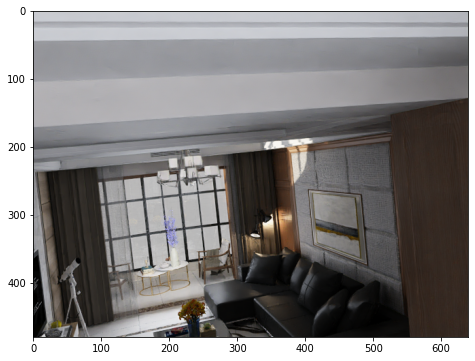

In [ ]:
# Let's take a look at the dataset
import mmcv
import matplotlib.pyplot as plt

img = mmcv.imread('/content/mmsegmentation/dataset/compiled_dataset/cam/0.png')
plt.figure(figsize=(8, 6))
plt.imshow(mmcv.bgr2rgb(img))
plt.show()

In [ ]:
import os.path as osp
import numpy as np
from PIL import Image
import json
import mmengine

data_root = '/content/mmsegmentation/dataset/compiled_dataset/'
img_dir = 'cam/'
ann_dir = 'label/'

# get all the labels from a folders cocolabel.json and put them into a list

# Opening JSON file

# split train/val sets randomly

split_dir = 'splits'
mmengine.mkdir_or_exist(osp.join(data_root, split_dir))
filename_list = [osp.splitext(filename)[0] for filename in mmengine.scandir(
    osp.join(data_root, ann_dir), suffix='.png')]
with open(osp.join(data_root, split_dir, 'train.txt'), 'w') as f:
  # select first 4/5 as train set
  train_length = int(len(filename_list)*4/5)
  f.writelines(line + '\n' for line in filename_list[:train_length])
with open(osp.join(data_root, split_dir, 'val.txt'), 'w') as f:
  # select last 1/5 as train set
  f.writelines(line + '\n' for line in filename_list[train_length:])

# implement load_annotations funciton in the new dataset class

In [ ]:
from mmseg.registry import DATASETS
from mmseg.datasets import BaseSegDataset

@DATASETS.register_module()
class InteriorNetDataset(BaseSegDataset):
  METAINFO = dict(classes = classes, palette = palette)
  def __init__(self, **kwargs):
    super().__init__(img_suffix='.png', seg_map_suffix='.png', **kwargs)

In [ ]:
from mmengine import Config
cfg = Config.fromfile(config_file)

In [ ]:
# Since we use only one GPU, BN is used instead of SyncBN
cfg.norm_cfg = dict(type='BN', requires_grad=True)
cfg.crop_size = (256, 256)
cfg.model.data_preprocessor.size = cfg.crop_size
cfg.model.backbone.norm_cfg = cfg.norm_cfg
cfg.model.decode_head.norm_cfg = cfg.norm_cfg
cfg.model.auxiliary_head.norm_cfg = cfg.norm_cfg
# modify num classes of the model in decode/auxiliary head
cfg.model.decode_head.num_classes = 8
cfg.model.auxiliary_head.num_classes = 8

# Modify dataset type and path
cfg.dataset_type = 'InteriorNetDataset'
cfg.data_root = data_root

cfg.train_dataloader.batch_size = 8

cfg.train_pipeline = [
    dict(type='LoadImageFromFile'),
    dict(type='LoadAnnotations'),
    dict(type='RandomResize', scale=(320, 240), ratio_range=(0.5, 2.0), keep_ratio=True),
    dict(type='RandomCrop', crop_size=cfg.crop_size, cat_max_ratio=0.75),
    dict(type='RandomFlip', prob=0.5),
    dict(type='PackSegInputs')
]

cfg.test_pipeline = [
    dict(type='LoadImageFromFile'),
    dict(type='Resize', scale=(320, 240), keep_ratio=True),
    # add loading annotation after ``Resize`` because ground truth
    # does not need to do resize data transform
    dict(type='LoadAnnotations'),
    dict(type='PackSegInputs')
]

cfg.train_dataloader.dataset.type = cfg.dataset_type
cfg.train_dataloader.dataset.data_root = cfg.data_root
cfg.train_dataloader.dataset.data_prefix = dict(img_path=img_dir, seg_map_path=ann_dir)
cfg.train_dataloader.dataset.pipeline = cfg.train_pipeline
cfg.train_dataloader.dataset.ann_file = 'splits/train.txt'

cfg.val_dataloader.dataset.type = cfg.dataset_type
cfg.val_dataloader.dataset.data_root = cfg.data_root
cfg.val_dataloader.dataset.data_prefix = dict(img_path=img_dir, seg_map_path=ann_dir)
cfg.val_dataloader.dataset.pipeline = cfg.test_pipeline
cfg.val_dataloader.dataset.ann_file = 'splits/val.txt'

cfg.test_dataloader = cfg.val_dataloader


# Load the pretrained weights
cfg.load_from = 'resnest_s101-d8_deeplabv3plus_4xb4-160k_ade20k-512x512.py'

# Set up working dir to save files and logs.
cfg.work_dir = './work_dirs/tutorial'


cfg.train_cfg.max_iters = 200
cfg.train_cfg.val_interval = 200
cfg.default_hooks.logger.interval = 10
cfg.default_hooks.checkpoint.interval = 200

# Set seed to facilitate reproducing the result
cfg['randomness'] = dict(seed=0)

# Let's have a look at the final config used for training
# print(f'Config:\n{cfg.pretty_text}')

Config:
norm_cfg = dict(type='BN', requires_grad=True)
data_preprocessor = dict(
    type='SegDataPreProcessor',
    mean=[123.675, 116.28, 103.53],
    std=[58.395, 57.12, 57.375],
    bgr_to_rgb=True,
    pad_val=0,
    seg_pad_val=255,
    size=(512, 512))
model = dict(
    type='EncoderDecoder',
    data_preprocessor=dict(
        type='SegDataPreProcessor',
        mean=[123.675, 116.28, 103.53],
        std=[58.395, 57.12, 57.375],
        bgr_to_rgb=True,
        pad_val=0,
        seg_pad_val=255,
        size=(256, 256)),
    pretrained='open-mmlab://resnest101',
    backbone=dict(
        type='ResNeSt',
        depth=101,
        num_stages=4,
        out_indices=(0, 1, 2, 3),
        dilations=(1, 1, 2, 4),
        strides=(1, 2, 1, 1),
        norm_cfg=dict(type='BN', requires_grad=True),
        norm_eval=False,
        style='pytorch',
        contract_dilation=True,
        stem_channels=128,
        radix=2,
        reduction_factor=4,
        avg_down_stride=True),
  

In [ ]:
# from mmseg.datasets import build_dataset
# from mmseg.models import build_segmentor
# from mmseg.apis import train_segmentor


# Build the dataset
# datasets = [build_dataset(cfg.data.train)]

from mmseg.apis import init_model, inference_model, show_result_pyplot

from mmengine.runner import Runner

# result = inference_model(model, img)
# plt.figure(figsize=(8, 6))
# vis_result = show_result_pyplot(model, img, result)
# plt.imshow(mmcv.bgr2rgb(vis_result))

runner = Runner.from_cfg(cfg)

mmengine.mkdir_or_exist(osp.abspath(cfg.work_dir))

runner.train()


# Build the detector
# model = build_segmentor(cfg.model)
# Add an attribute for visualization convenience
# model.CLASSES = datasets[0].CLASSES

# print(model.CLASSES)
# print(len(model.CLASSES))

# Create work_dir
# train_segmentor(model, datasets, cfg, distributed=False, validate=True, 
#                 meta=dict())

03/13 17:00:59 - mmengine - INFO - 
------------------------------------------------------------
System environment:
    sys.platform: linux
    Python: 3.9.16 (main, Dec  7 2022, 01:11:51) [GCC 9.4.0]
    CUDA available: True
    numpy_random_seed: 0
    GPU 0: Tesla T4
    CUDA_HOME: /usr/local/cuda
    NVCC: Cuda compilation tools, release 11.8, V11.8.89
    GCC: x86_64-linux-gnu-gcc (Ubuntu 9.4.0-1ubuntu1~20.04.1) 9.4.0
    PyTorch: 1.13.1+cu116
    PyTorch compiling details: PyTorch built with:
  - GCC 9.3
  - C++ Version: 201402
  - Intel(R) Math Kernel Library Version 2020.0.0 Product Build 20191122 for Intel(R) 64 architecture applications
  - Intel(R) MKL-DNN v2.6.0 (Git Hash 52b5f107dd9cf10910aaa19cb47f3abf9b349815)
  - OpenMP 201511 (a.k.a. OpenMP 4.5)
  - LAPACK is enabled (usually provided by MKL)
  - NNPACK is enabled
  - CPU capability usage: AVX2
  - CUDA Runtime 11.6
  - NVCC architecture flags: -gencode;arch=compute_37,code=sm_37;-gencode;arch=compute_50,code=sm_50;-g

/content/mmsegmentation/mmseg/models/backbones/resnet.py:431: UserWarning: DeprecationWarning: pretrained is a deprecated, please use "init_cfg" instead
  warnings.warn('DeprecationWarning: pretrained is a deprecated, '
/content/mmsegmentation/mmseg/models/builder.py:36: UserWarning: ``build_loss`` would be deprecated soon, please use ``mmseg.registry.MODELS.build()`` 
  warnings.warn('``build_loss`` would be deprecated soon, please use '
/content/mmsegmentation/mmseg/models/losses/cross_entropy_loss.py:235: UserWarning: Default ``avg_non_ignore`` is False, if you would like to ignore the certain label and average loss over non-ignore labels, which is the same with PyTorch official cross_entropy, set ``avg_non_ignore=True``.
  warnings.warn(


03/13 17:01:03 - mmengine - INFO - Distributed training is not used, all SyncBatchNorm (SyncBN) layers in the model will be automatically reverted to BatchNormXd layers if they are used.
03/13 17:01:03 - mmengine - INFO - Hooks will be executed in the following order:
before_run:
(VERY_HIGH   ) RuntimeInfoHook                    
(BELOW_NORMAL) LoggerHook                         
 -------------------- 
before_train:
(VERY_HIGH   ) RuntimeInfoHook                    
(NORMAL      ) IterTimerHook                      
(VERY_LOW    ) CheckpointHook                     
 -------------------- 
before_train_epoch:
(VERY_HIGH   ) RuntimeInfoHook                    
(NORMAL      ) IterTimerHook                      
(NORMAL      ) DistSamplerSeedHook                
 -------------------- 
before_train_iter:
(VERY_HIGH   ) RuntimeInfoHook                    
(NORMAL      ) IterTimerHook                      
 -------------------- 
after_train_iter:
(VERY_HIGH   ) RuntimeInfoHook                

/content/mmsegmentation/mmseg/engine/hooks/visualization_hook.py:61: UserWarning: The draw is False, it means that the hook for visualization will not take effect. The results will NOT be visualized or stored.
  warnings.warn('The draw is False, it means that the '


03/13 17:01:04 - mmengine - WARNING - The "loop" registry in mmseg did not set import location. Fallback to call `mmseg.utils.register_all_modules` instead.
03/13 17:01:04 - mmengine - WARNING - Failed to import mmseg.datasets.samplers, please check the location of the registry data sampler is correct.


/usr/local/lib/python3.9/dist-packages/torch/utils/data/dataloader.py:554: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


03/13 17:01:04 - mmengine - WARNING - Failed to import mmseg.engine.schedulers, please check the location of the registry parameter scheduler is correct.


/usr/local/lib/python3.9/dist-packages/mmengine/evaluator/metric.py:47: UserWarning: The prefix is not set in metric class IoUMetric.
  warnings.warn('The prefix is not set in metric class '


03/13 17:01:05 - mmengine - INFO - load model from: open-mmlab://resnest101
03/13 17:01:05 - mmengine - INFO - Loads checkpoint by openmmlab backend from path: open-mmlab://resnest101
Loads checkpoint by local backend from path: resnest_s101-d8_deeplabv3plus_4xb4-160k_ade20k-512x512.py


FileNotFoundError: ignored

In [ ]:
# img = mmcv.imread('/content/mmsegmentation/dataset/vanilla/3FO4MMJNGLKB_Bedroom/cam0/data/0.png')

# model.cfg = cfg
# result = inference_segmentor(model, img)
# plt.figure(figsize=(8, 6))



# show_result_pyplot(model, img, result, palette)

from mmseg.apis import init_model, inference_model, show_result_pyplot

# Init the model from the config and the checkpoint
checkpoint_path = './work_dirs/tutorial/iter_200.pth'
model = init_model(cfg, checkpoint_path, 'cuda:0')

img = mmcv.imread('/content/mmsegmentation/dataset/compiled_dataset/cam/0.png')
result = inference_model(model, img)
plt.figure(figsize=(8, 6))
vis_result = show_result_pyplot(model, img, result)
plt.imshow(mmcv.bgr2rgb(vis_result))